# Classification

In [1]:
import importlib.machinery

loader = importlib.machinery.SourceFileLoader("data_import", "../../classification/data_import.py")
data_import = loader.load_module()

loader = importlib.machinery.SourceFileLoader("data_preprocessing", "../../classification/data_preprocessing.py")
data_preprocessing = loader.load_module()

loader = importlib.machinery.SourceFileLoader("model_evaluator", "../../classification/model_evaluator.py")
model_evaluator = loader.load_module()

import numpy as np
import pandas as pd
from data_preprocessing import KMeansDimensionalityReduction
import model_evaluator
from model_evaluator import metrics_function
import data_import
import sklearn.metrics as metrics
import random
import math

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt

In [7]:
# Import data
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test("Contagio")

In [8]:
X_mal = np.copy(X_train[y_train==1])
y_mal = np.ones(X_mal.shape[0])

## Comparison of random_state = 0

In [25]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9973549146821374
0.0021396396396396395


In [13]:
clf = DecisionTreeClassifier()
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print(sum(kfold_scores_npv['test_f1_score'])/5)
print(sum(kfold_scores_npv['test_false_neg'])/5)

0.9976351323203728
0.0022522522522522522


without random_state=0 result can change, wor

## Testing criterion

In [14]:
for crit in ["gini", "entropy", "log_loss"]:
    clf = DecisionTreeClassifier(random_state=0)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("criterion " + crit)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-----------------")

criterion gini
0.9973549146821374
0.0021396396396396395
0.9970927898195804
-----------------
criterion entropy
0.9973549146821374
0.0021396396396396395
0.9970927898195804
-----------------
criterion log_loss
0.9973549146821374
0.0021396396396396395
0.9970927898195804
-----------------


## Testing splitter

In [15]:
for spli in ["best", "random"]:
    clf = DecisionTreeClassifier(random_state=0, splitter=spli)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("splitter " + spli)
    print(sum(kfold_scores_npv['test_f1_score'])/5)
    print(sum(kfold_scores_npv['test_false_neg'])/5)
    print(sum(kfold_scores_npv['test_accuracy_score'])/5)
    print("-----------------")

splitter best
0.9973549146821374
0.0021396396396396395
0.9970927898195804
-----------------
splitter random
0.996904594075507
0.002702702702702703
0.9965980273390462
-----------------


## Testing max_depth

In [36]:
fn = []
acc = []
k=5
for m in range(2,20,1):
    clf = DecisionTreeClassifier(random_state=0, max_depth=m)
    
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=k)
    
    acc.append(sum(kfold_scores_npv['test_accuracy_score'])/k)
    fn.append(sum(kfold_scores_npv['test_false_neg'])/k)

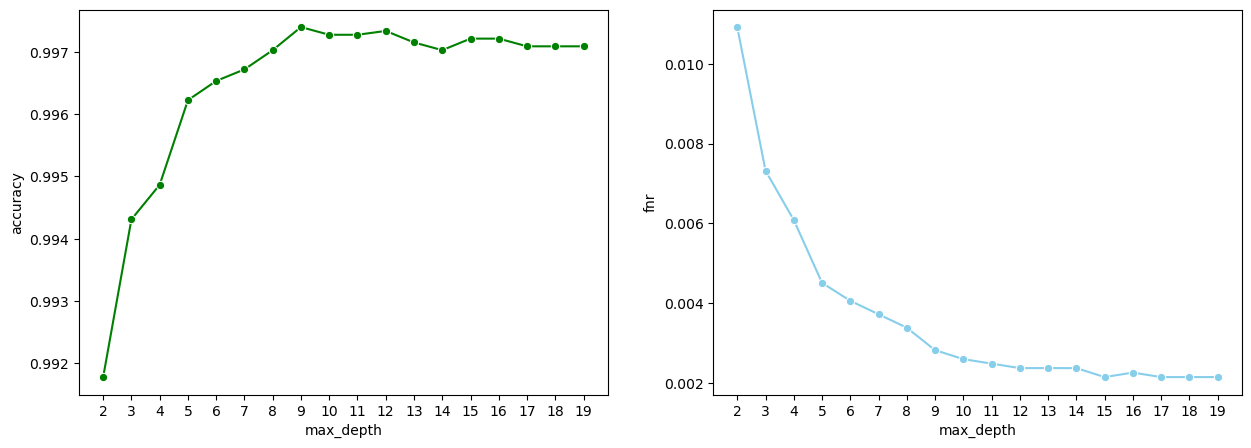

In [43]:
import seaborn as sns
x = np.arange(2, 20, 1)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
g_acc_2 = sns.lineplot(ax=axes[0], x=x, y=acc, marker="o", errorbar=None, legend=True, color='green')
g_fnr_2 = sns.lineplot(ax=axes[1], x=x, y=fn, marker="o", errorbar=None, legend=True, color='skyblue')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('accuracy')
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('fnr')

axes[1].set_xticks(x)
axes[1].set_xticks(x)

plt.show()

Best max_depth 15

In [49]:
for i in range(0, 18):
    print("Depth ",i+2)
    print("Accuracy: ",acc[i])
    print("False neg: ",fn[i])

Depth  2
Accuracy:  0.9917731510679237
False neg:  0.010923423423423423
Depth  3
Accuracy:  0.9943091698338925
False neg:  0.00731981981981982
Depth  4
Accuracy:  0.9948659665198927
False neg:  0.0060810810810810806
Depth  5
Accuracy:  0.9962267402813556
False neg:  0.0045045045045045045
Depth  6
Accuracy:  0.9965360505195244
False neg:  0.004054054054054054
Depth  7
Accuracy:  0.9967216557910739
False neg:  0.0037162162162162156
Depth  8
Accuracy:  0.9970309469005947
False neg:  0.0033783783783783786
Depth  9
Accuracy:  0.9974021191863974
False neg:  0.002815315315315315
Depth  10
Accuracy:  0.9972783950911298
False neg:  0.00259009009009009
Depth  11
Accuracy:  0.9972783568338338
False neg:  0.0024774774774774773
Depth  12
Accuracy:  0.9973402188814676
False neg:  0.0023648648648648646
Depth  13
Accuracy:  0.9971547092531582
False neg:  0.002364864864864865
Depth  14
Accuracy:  0.9970309469005947
False neg:  0.0023648648648648646
Depth  15
Accuracy:  0.997216552172144
False neg:  0.0

- 15 is the first best value of false rate
- 9  is the first best value of accuracy

## Conclusion

In [75]:
clf = DecisionTreeClassifier(random_state=0, max_depth=15)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)

print("Train score")
#print("f1: ",sum(kfold_scores_npv['test_f1_score'])/5)
print("fnr: ",sum(kfold_scores_npv['test_false_neg'])/5)
print("acc: ",sum(kfold_scores_npv['test_accuracy_score'])/5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
kfold_scores_npv = metrics_function(y_test, y_pred)
print("\nTest score")
#print("f1: ",kfold_scores_npv['f1_score'])
print("fnr: ",kfold_scores_npv['false_neg'])
print("acc: ",kfold_scores_npv['accuracy_score'])

Train score
fnr:  0.0021396396396396395
acc:  0.997216552172144

Test score
fnr:  0.0022522522522522522
acc:  0.9975259772389906


## Evasion

In [43]:
clf = DecisionTreeClassifier(random_state=0, max_depth=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=0)

In [51]:
evaded=0
count=0
K = np.zeros(X_mal.shape[1])
for x_mal in X_mal:
    for dim in range(x_mal.shape[0]):
        Y = np.copy(x_mal)
        for i in range(1, 100):
            Y[dim] = Y[dim] + 1
            y_pred = clf.predict(Y.reshape(1,-1))

            if y_pred != 1:
                #print("\tTest score with " + str(i) + " more")
                #print("\tWRONG label")
                #print("\tlabel predicted as " + str(y_pred))
                K[dim] += i
                evaded = 1
                break
    if evaded:
        count+=1
        evaded=0
K = K.astype(int)
print("Evasion ratio: ", count/X_mal.shape[0], "%")
print("K: ", K)

Evasion ratio:  0.9140765765765766 %
K:  [470468 231901   4820      7     70     11     35      6      0     20
      6    216  14906      3    247      3      3      3    414      0
      0]


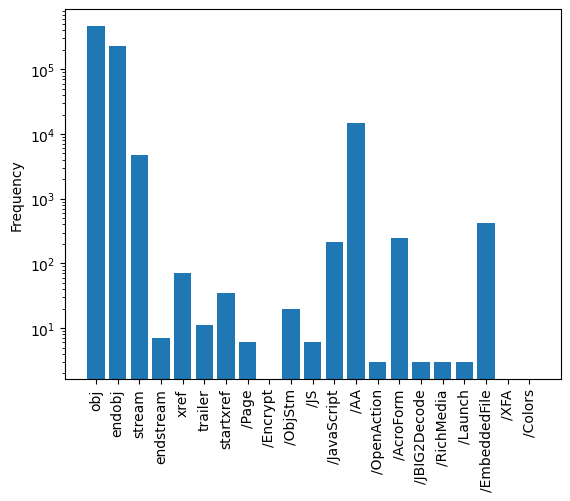

In [52]:
bin_labels = ["obj", "endobj", "stream", "endstream", "xref", "trailer", "startxref", "/Page", "/Encrypt", "/ObjStm", "/JS", "/JavaScript", "/AA", "/OpenAction", "/AcroForm", "/JBIG2Decode", "/RichMedia", "/Launch", "/EmbeddedFile", "/XFA", "/Colors"]

plt.bar(bin_labels, K)

plt.ylabel('Frequency')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], bin_labels, rotation=90)
plt.yscale("log")

plt.show()

## Countermeasures

In [9]:
clf = DecisionTreeClassifier(random_state=0, max_depth=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=0)

In [10]:
X_train_improved = np.copy(X_train)
y_train_improved = np.copy(y_train)
bet_factor = X_mal.shape[0]
count=1
print("iteration", count, ":", bet_factor)
fact = []
fact.append(bet_factor)
while bet_factor > 0:
    matrix = []
    for x_mal in X_mal:
        evaded=0
        for dim in range(x_mal.shape[0]):
            Y = np.copy(x_mal)
            for i in range(1, 50):
                Y[dim] = Y[dim] + 1
                y_pred = clf.predict(Y.reshape(1,-1))
                if y_pred != 1:
                    Z = np.copy(Y)
                    matrix.append(Z)
                    evaded=1
                    break
            if evaded:
                break
    matrix = np.array(matrix)
    
    bet_factor = matrix.shape[0]
    print("iteration", count, ":", bet_factor)
    fact.append(bet_factor)
    
    X_train_improved = np.vstack((X_train_improved, matrix))
    y_train_improved = np.concatenate((y_train_improved, np.ones(matrix.shape[0])))
    
    clf.fit(X_train_improved, y_train_improved)
    count += 1

iteration 1 : 8880
iteration 1 : 8106
iteration 2 : 8106
iteration 3 : 8807
iteration 4 : 8113
iteration 5 : 8074
iteration 6 : 8088
iteration 7 : 8089
iteration 8 : 8850
iteration 9 : 8843
iteration 10 : 8863
iteration 11 : 6980
iteration 12 : 7349
iteration 13 : 683
iteration 14 : 666
iteration 15 : 511
iteration 16 : 8062
iteration 17 : 110
iteration 18 : 123
iteration 19 : 81
iteration 20 : 99
iteration 21 : 69
iteration 22 : 901
iteration 23 : 594
iteration 24 : 48
iteration 25 : 61
iteration 26 : 62
iteration 27 : 31
iteration 28 : 31
iteration 29 : 34
iteration 30 : 27
iteration 31 : 18
iteration 32 : 18
iteration 33 : 18
iteration 34 : 18
iteration 35 : 22
iteration 36 : 43


KeyboardInterrupt: 

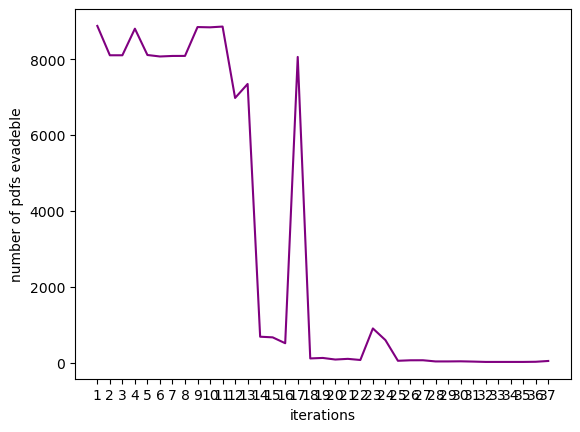

In [11]:
x = np.arange(1, count+1, 1)
y = fact

fig, ax = plt.subplots()

ax.set_xticks(x)

ax.plot(x, y, '-', color="purple")

ax.set_xlabel('iterations')
ax.set_ylabel('number of pdfs evadeble')

plt.show()

In [16]:
column_names = ["obj", "endobj", "stream", "endstream", "xref", "trailer", "startxref", "/Page", "/Encrypt", "/ObjStm", "/JS", "/JavaScript", "/AA", "/OpenAction", "/AcroForm", "/JBIG2Decode", "/RichMedia", "/Launch", "/EmbeddedFile", "/XFA", "/Colors"]
df_improved = pd.DataFrame(X_train_improved, columns=column_names)
df_improved.describe()

,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,...,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors
0,8,8,2,2,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
1,6,6,2,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,9,3,3,1,1,1,1,0,0,...,2,0,0,0,0,0,0,0,0,0
3,98,98,91,91,0,0,3,3,0,12,...,0,0,0,2,0,0,0,9,0,0
4,4,4,1,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


## Plot Tree

|--- /JS <= 0.50
|   |--- /XFA <= 0.50
|   |   |--- startxref <= 0.50
|   |   |   |--- class: True
|   |   |--- startxref >  0.50
|   |   |   |--- /Launch <= 0.50
|   |   |   |   |--- /JavaScript <= 0.50
|   |   |   |   |   |--- /Colors <= 0.50
|   |   |   |   |   |   |--- /AA <= 0.50
|   |   |   |   |   |   |   |--- /EmbeddedFile <= 8.50
|   |   |   |   |   |   |   |   |--- xref <= 0.50
|   |   |   |   |   |   |   |   |   |--- obj <= 20.50
|   |   |   |   |   |   |   |   |   |   |--- /Encrypt <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- /Encrypt >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |--- obj >  20.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- xref >  0.50
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- /EmbeddedFile >  8.50
|   |   |   |   |   | 

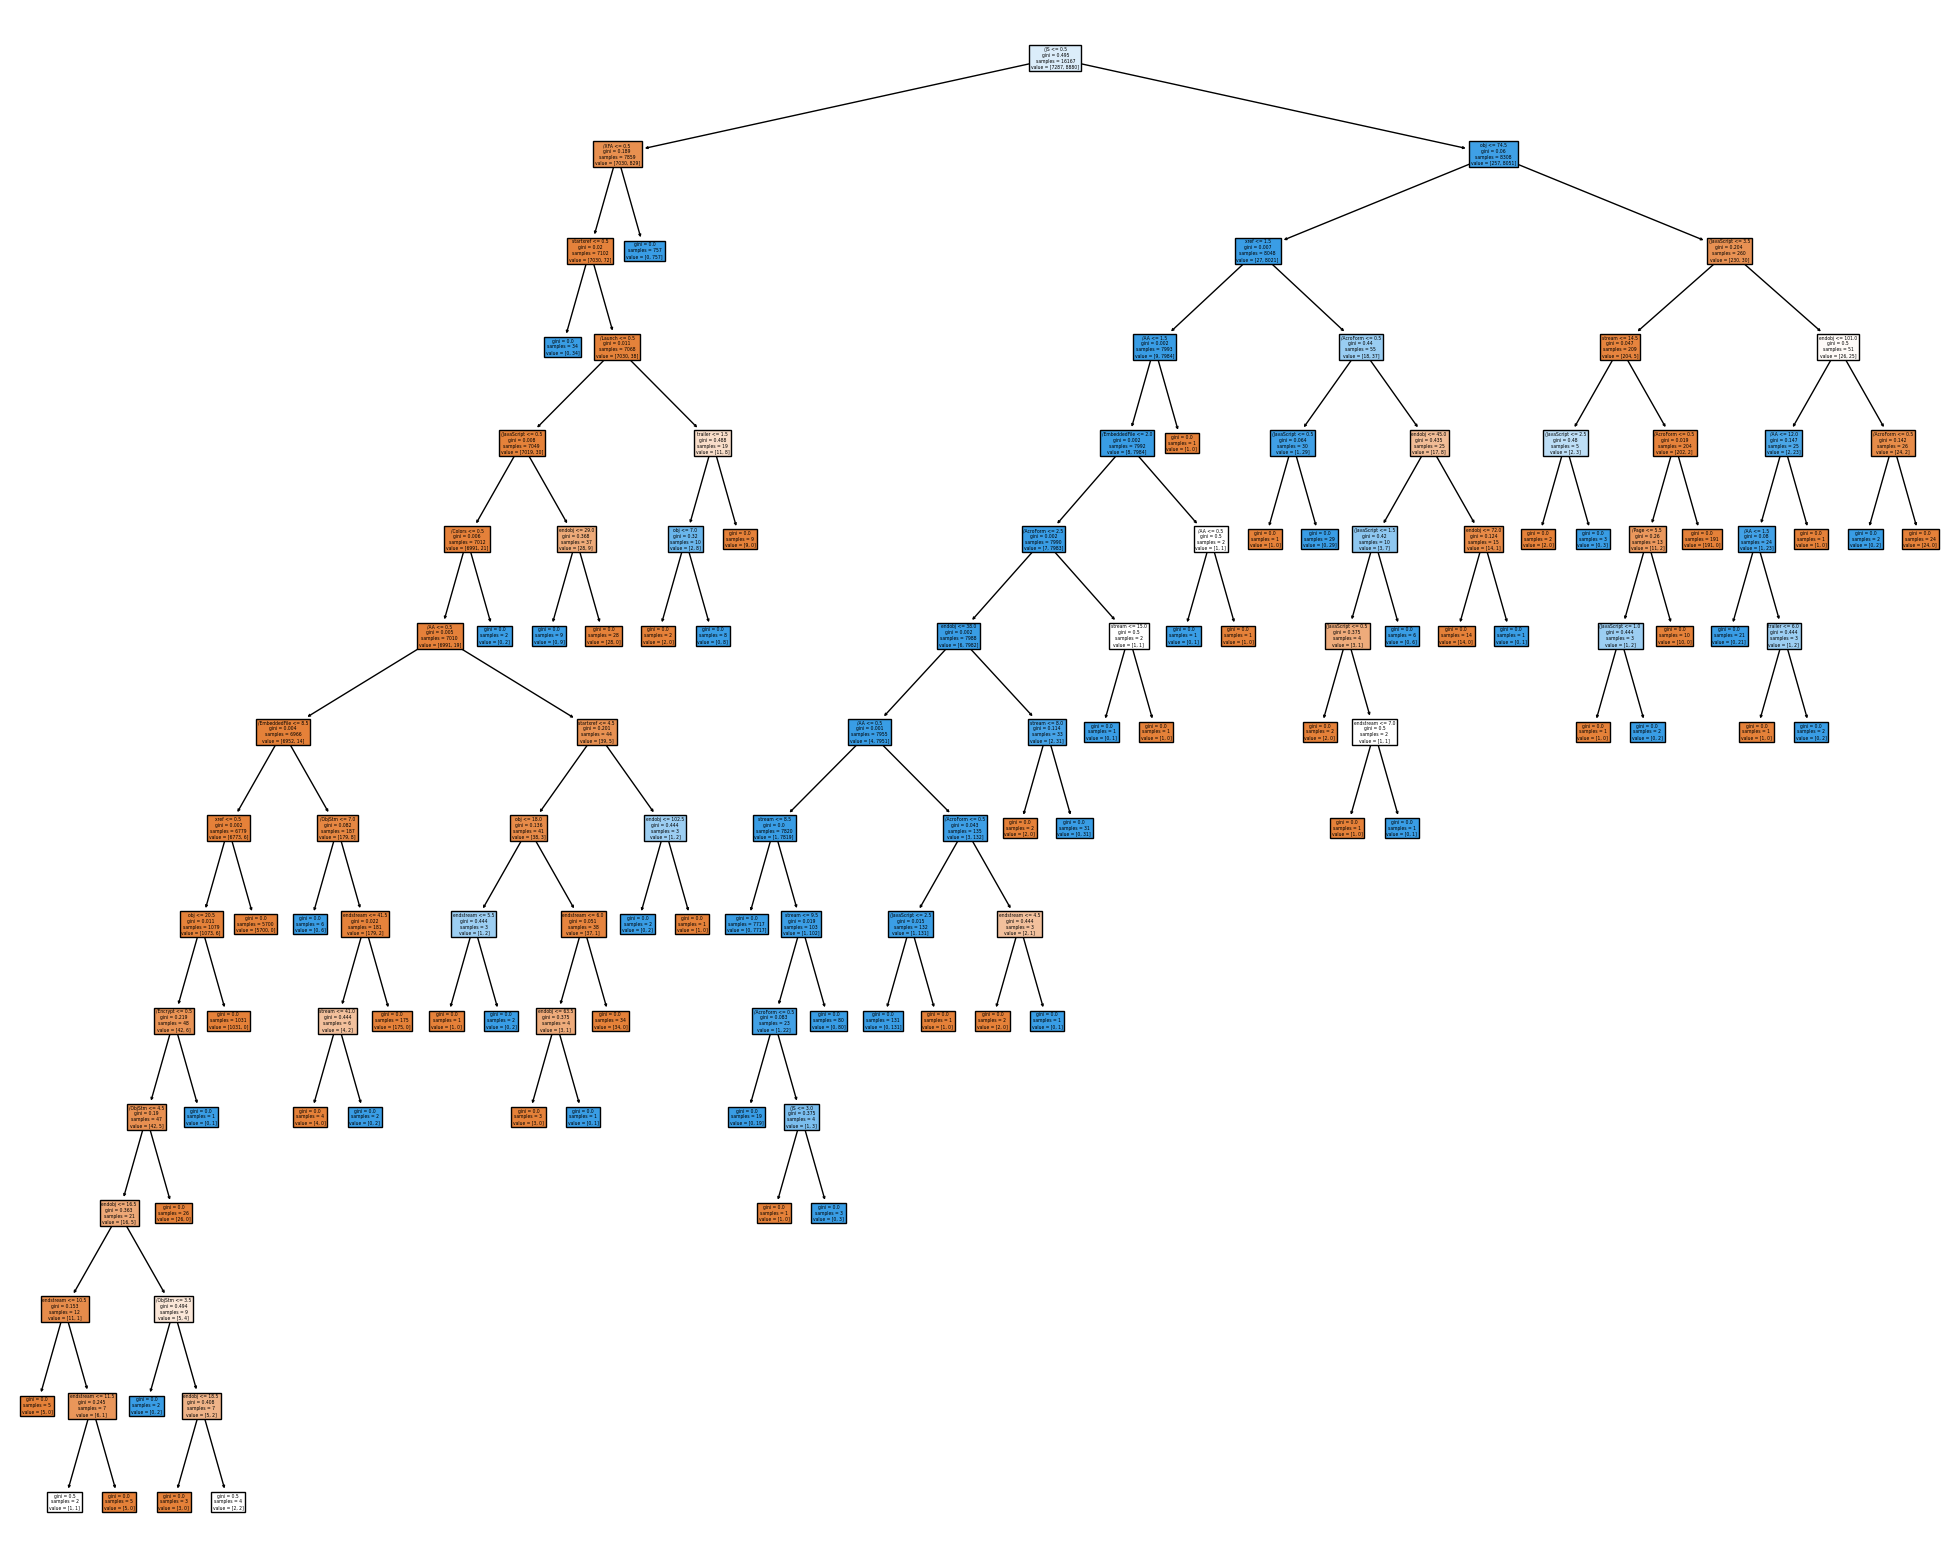

In [62]:
clf = DecisionTreeClassifier(random_state=0, max_depth=15)
clf.fit(X_train, y_train)

text_representation = tree.export_text(clf, feature_names=list(df_tot.columns)[:-1])
print(text_representation)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=list(df_tot.columns)[:-1], filled=True)
plt.show()
fig.savefig("decistion_tree.png")